In [18]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import *
from fastai.vision.all import *

ddgs = DDGS()

def search_images(term, max_images=90):
    print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')


In [20]:
searches = 'grizzly bear','american black bear'
path = Path('bears')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))

Searching for 'grizzly bear photo'
Searching for 'american black bear photo'


In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

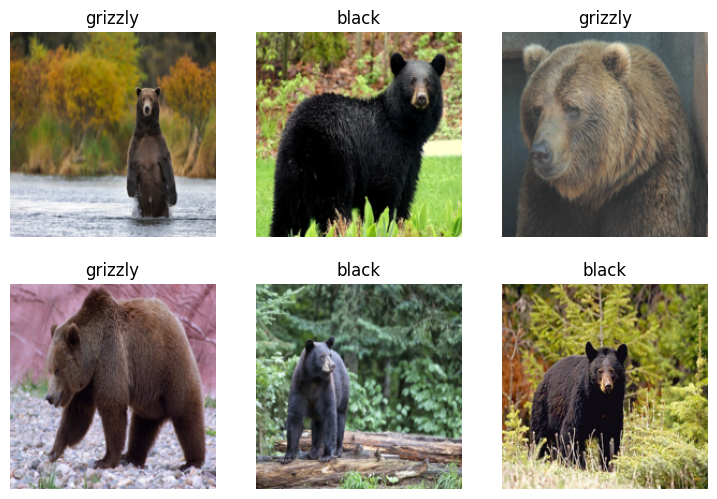

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    # Inputs for our model are images, outputs are categories (bird or forest)
    get_items=get_image_files, 
    # Returns a list of all images in the path
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # Split the data into training and validation sets, using 20% for validation
    get_y=parent_label,
    # The label for each image is the name of the folder it's in
    item_tfms=[Resize(192, method='squish')]
    # Resize each image to 192x192 pixels by squishing instead of cropping
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [24]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
# Create a model using the data in `dls`, using the ResNet18 architecture
learn.fine_tune(3)
# Fine-tune the model for 3 epochs

epoch,train_loss,valid_loss,error_rate,time
0,0.924896,0.819115,0.281250,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.297222,0.492413,0.156250,00:06
1,0.173109,0.381924,0.125000,00:06
2,0.121418,0.232416,0.093750,00:06


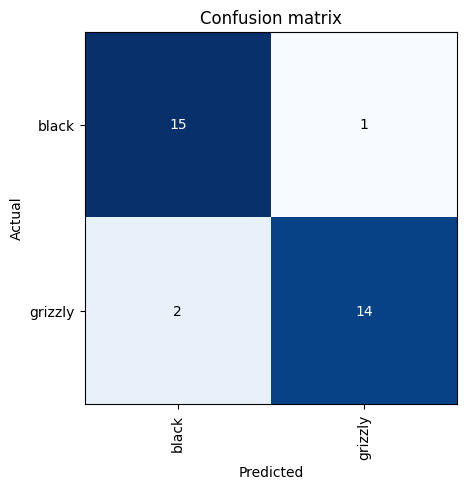

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

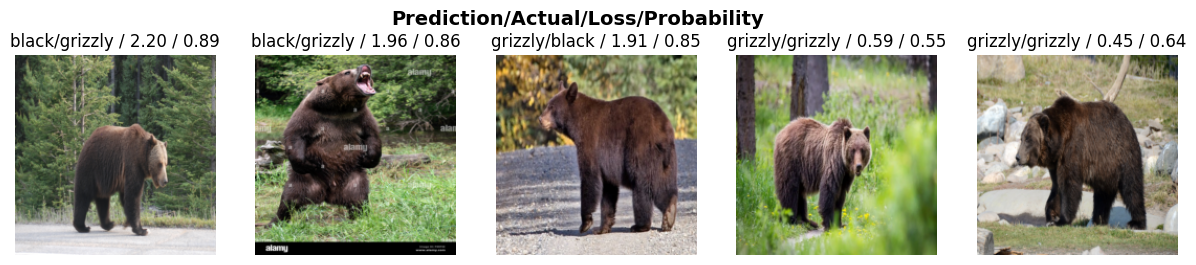

In [26]:
interp.plot_top_losses(5, nrows=1)

In [27]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner